# Задача: по присланному видео оценить кандидата

Видео: https://community.mars-one.com/profile/f8cab16b-89fd-4fa6-9c17-d5f6501535cf

Сможем ли решить имеющимися силами?

![](products.png)

API (application programming interface) - описание того, как взаимодействовать с внешней программой (приложением/сайтом/и т.д.).

HTTP API - взаимодействие с сервером посредством http-запросов. Часто употребляют термин REST-API, которым обозначают перечень рекоммендаций по проектированию HTTP-API

## Учимся делать POST-запросы с помощью requests:

In [17]:
import requests
# Передаем данные как "форму":
r = requests.post('https://httpbin.org/post', data = {'key':'value'})

# Передаем данные как json:
import json
url = 'https://api.github.com/some/endpoint'
payload = {'some': 'data'}
r = requests.post(url, data=json.dumps(payload))

# Передаем данные как multi-part:
url = 'https://httpbin.org/post'
files = {'file': open('asset-2774908-14.png', 'rb')}

r = requests.post(url, files=files)
# r.text

Больше информации про то, как общаться с HTTP-API: https://habr.com/company/yandex/blog/265569/

Больше информации про POST-запросы в requests: http://docs.python-requests.org/en/master/user/quickstart/#more-complicated-post-requests

# Google Cloud API
### Попробуем Vision API?

Можно работать с [REST API](https://habr.com/company/yandex/blog/265569/) посредством http-запросов, а можно из python с помощью их библиотеки: https://cloud.google.com/vision/docs/libraries

Забегая вперед, у меня не получилось сходу завести REST API. Требуют кредитку и фотку паспорта. Судя по этому туториалу, с библиотекой ситуация другая. Можете попытать счастья: https://www.youtube.com/watch?v=tqFk8bzv2ys

#### Возможности работы с фото:
https://cloud.google.com/vision/


#### Если работаем как с REST API, то нам нужно создать API key: 

https://cloud.google.com/docs/authentication/api-keys#creating_an_api_key

![](step1.png)

Как делать request для фото: 

https://cloud.google.com/vision/docs/request

Картинку можно подавать как файл внутри json. Для этого нужно его закодировать в base-64. Либо можно передавать по ссылке или из Google Drive. Подробности: https://cloud.google.com/vision/docs/request#providing_the_image

Вопрос про то, как кодировать картинку в base64 на StackOverflow: https://stackoverflow.com/questions/3715493/encoding-an-image-file-with-base64

Какие типы вопросов можно задавать про картинку: https://cloud.google.com/vision/docs/reference/rest/v1/Feature

In [1]:
import base64

with open('asset-2774908-14.png', "rb") as image_file:
    encoded_string = base64.b64encode(image_file.read()).decode("utf-8") 

In [2]:
YOUR_API_KEY = 'ADD API KEY HERE'

In [3]:
import requests

body = {
  "requests":[
    {
      "image":{
        "content": encoded_string
      },
      "features":[
        {
          "type":"LABEL_DETECTION",
          "maxResults":10
        }
      ]
    }
  ]
}

import json
json.dumps(body)
resp = requests.post('https://vision.googleapis.com/v1/images:annotate?key={}'.format(YOUR_API_KEY), json=body)

In [4]:
resp.text

'{\n  "error": {\n    "code": 400,\n    "message": "API key not valid. Please pass a valid API key.",\n    "status": "INVALID_ARGUMENT",\n    "details": [\n      {\n        "@type": "type.googleapis.com/google.rpc.Help",\n        "links": [\n          {\n            "description": "Google developers console",\n            "url": "https://console.developers.google.com"\n          }\n        ]\n      }\n    ]\n  }\n}\n'

Говорят, что надо добавить разрешения для ключа. Возвращаемся на страничку создания ключа:

![](step2.png)
////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////
![](step3.png)
////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////
![](step4.png)
////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////
![](step5.png)

In [26]:
resp = requests.post('https://vision.googleapis.com/v1/images:annotate?key={}'.format(YOUR_API_KEY), json=body)

In [27]:
resp.text

'{\n  "error": {\n    "code": 403,\n    "message": "This API method requires billing to be enabled. Please enable billing on project #715111000845 by visiting https://console.developers.google.com/billing/enable?project=715111000845 then retry. If you enabled billing for this project recently, wait a few minutes for the action to propagate to our systems and retry.",\n    "status": "PERMISSION_DENIED",\n    "details": [\n      {\n        "@type": "type.googleapis.com/google.rpc.Help",\n        "links": [\n          {\n            "description": "Google developer console API key",\n            "url": "https://console.developers.google.com/project/715111000845/apiui/credential"\n          }\n        ]\n      },\n      {\n        "@type": "type.googleapis.com/google.rpc.Help",\n        "links": [\n          {\n            "description": "Google developers console billing",\n            "url": "https://console.developers.google.com/billing/enable?project=715111000845"\n          }\n       

Говорят, что бесплатно нельзя...

Пошел вводить данные карты, но они сказали, что так не пойдет: нужна фотка паспорта и моей карточки (где все закрыто, кроме последних 4-х цифр). Забил на это дело и пошел к Microsoft

# Microsoft Face API:
https://www.microsoft.com/cognitive-services/en-us/face-api - дают 7-дневный пробный период без кредитки
    
https://docs.microsoft.com/ru-ru/azure/cognitive-services/face/quickstarts/python - quick start

In [1]:
subscription_key = 'ADD API KEY HERE'

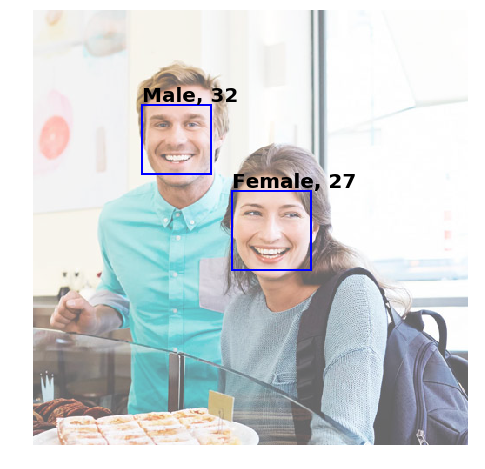

In [5]:
# Копируем пример с сайта:

import requests
# If you are using a Jupyter notebook, uncomment the following line.
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image
from matplotlib import patches
from io import BytesIO

# Replace <Subscription Key> with your valid subscription key.
# subscription_key = "<Subscription Key>"
assert subscription_key

# You must use the same region in your REST call as you used to get your
# subscription keys. For example, if you got your subscription keys from
# westus, replace "westcentralus" in the URI below with "westus".
#
# Free trial subscription keys are generated in the westcentralus region.
# If you use a free trial subscription key, you shouldn't need to change
# this region.
face_api_url = 'https://westcentralus.api.cognitive.microsoft.com/face/v1.0/detect'

# Set image_url to the URL of an image that you want to analyze.
image_url = 'https://how-old.net/Images/faces2/main007.jpg'

headers = {'Ocp-Apim-Subscription-Key': subscription_key}
params = {
    'returnFaceId': 'true',
    'returnFaceLandmarks': 'false',
    'returnFaceAttributes': 'age,gender,headPose,smile,facialHair,glasses,' +
    'emotion,hair,makeup,occlusion,accessories,blur,exposure,noise'
}
data = {'url': image_url}
response = requests.post(face_api_url, params=params, headers=headers, json=data)
faces = response.json()

# Display the original image and overlay it with the face information.
image = Image.open(BytesIO(requests.get(image_url).content))
plt.figure(figsize=(8, 8))
ax = plt.imshow(image, alpha=0.6)
for face in faces:
    fr = face["faceRectangle"]
    fa = face["faceAttributes"]
    origin = (fr["left"], fr["top"])
    p = patches.Rectangle(
        origin, fr["width"], fr["height"], fill=False, linewidth=2, color='b')
    ax.axes.add_patch(p)
    plt.text(origin[0], origin[1], "%s, %d"%(fa["gender"].capitalize(), fa["age"]),
             fontsize=20, weight="bold", va="bottom")
_ = plt.axis("off")

Но мы же запрашивали кучу информации: age, gender, headPose, smile, facialHair, glasses, ... Где это все?

In [2]:
faces

Судя по json, ребята радуются. Хоть им и не принесли еды... Давайте попробуем загрузить свою фотографию?

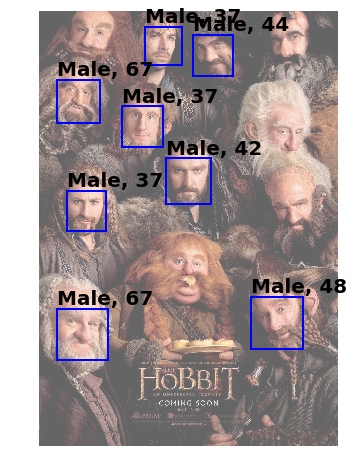

In [9]:
# Копируем пример с сайта:

import requests
# If you are using a Jupyter notebook, uncomment the following line.
#%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image
from matplotlib import patches
from io import BytesIO

# Replace <Subscription Key> with your valid subscription key.
# subscription_key = "<Subscription Key>"
assert subscription_key

# You must use the same region in your REST call as you used to get your
# subscription keys. For example, if you got your subscription keys from
# westus, replace "westcentralus" in the URI below with "westus".
#
# Free trial subscription keys are generated in the westcentralus region.
# If you use a free trial subscription key, you shouldn't need to change
# this region.
face_api_url = 'https://westcentralus.api.cognitive.microsoft.com/face/v1.0/detect'

# Set image_url to the URL of an image that you want to analyze.

headers = {'Ocp-Apim-Subscription-Key': subscription_key, 
           'Content-Type': 'application/octet-stream'}
params = {
    'returnFaceId': 'true',
    'returnFaceLandmarks': 'false',
    'returnFaceAttributes': 'age,gender,headPose,smile,facialHair,glasses,' +
    'emotion,hair,makeup,occlusion,accessories,blur,exposure,noise'
}

img_path = 'hobbits.jpg'#'asset-2774908-14.png'

with open(img_path, "rb") as image_file:
    data = image_file.read()
    
response = requests.post(face_api_url, params=params, headers=headers, data=data)
faces = response.json()

# Display the original image and overlay it with the face information.
image = Image.open(img_path)
plt.figure(figsize=(8, 8))
ax = plt.imshow(image, alpha=0.6)
for face in faces:
    fr = face["faceRectangle"]
    fa = face["faceAttributes"]
    origin = (fr["left"], fr["top"])
    p = patches.Rectangle(
        origin, fr["width"], fr["height"], fill=False, linewidth=2, color='b')
    ax.axes.add_patch(p)
    plt.text(origin[0], origin[1], "%s, %d"%(fa["gender"].capitalize(), fa["age"]),
             fontsize=20, weight="bold", va="bottom")
_ = plt.axis("off")

In [1]:
faces

#### Окей, с изобрежением разобрались. Давайте поработаем с аудио-дорожкой? Google API скорее всего будет за деньги. Что насчет Yandex SpeechKit?

# Yandex SpeechKit
https://tech.yandex.ru/speechkit/

Нас не интересует встраивание этой технологии в мобильное приложение. Так что идем в https://tech.yandex.ru/speechkit/cloud/ . Отсюда в кабинет разработчика: https://developer.tech.yandex.ru и получаем там API ключ на 30 дней

С новеньким ключем читаем документацию: https://tech.yandex.ru/speechkit/cloud/doc/guide/concepts/speechkit-cloud-asr-quick-start-docpage/

Проблематично что-то понять, но гугление дает прекрасный пример на Питоне: https://toster.ru/q/310132

In [11]:
import requests
from bs4 import BeautifulSoup

KEY = 'f1b7e04b-24e1-4458-a295-9b1360385300'
#UUID можно любой (01ae13cb744628b58fb536d496daa1e6)
UUID='01ae13cb744628b58fb536d496daa1e7'

url = 'https://asr.yandex.net/asr_xml?key=' + KEY + '&uuid=' + UUID + '&topic=queries&lang=en-US'
headers = {"Content-Type": 'audio/x-mpeg-3'}
#файл распознования
data = open('test.mp3', 'rb')
    
response = requests.post(url, headers=headers, data=data)

In [14]:
print(response.text)

<?xml version="1.0" encoding="utf-8"?>
<recognitionResults success="1">
	<variant confidence="0">Software engineer frontal africa BSC computer sciences through heriot watt plumbing focuses on the you've been given them something to believe in is actions speak louder than words to person if we can make a tomatoes</variant>
	<variant confidence="0">Software engineer frontal africa BSC computer sciences through heriot watt plumbing focuses on the you've been given them something to believe in is actions speak louder than words to person if we can make to mars</variant>
	<variant confidence="0">Software engineer frontal africa BSC computer sciences through heriotwatt plumbing focuses on the you've been given them something to believe in is actions speak louder than words to person if we can make a tomatoes</variant>
	<variant confidence="0">Software engineer frontal africa BSC computer sciences through heriotwatt plumbing focuses on the you've been given them something to believe in is act

In [15]:
import xml.etree.ElementTree as ET

In [16]:
root = ET.fromstring(response.text)

In [19]:
text_vars = []

for child in root:
    text_vars.append(child.text)

In [20]:
text_vars

["Software engineer frontal africa BSC computer sciences through heriot watt plumbing focuses on the you've been given them something to believe in is actions speak louder than words to person if we can make a tomatoes",
 "Software engineer frontal africa BSC computer sciences through heriot watt plumbing focuses on the you've been given them something to believe in is actions speak louder than words to person if we can make to mars",
 "Software engineer frontal africa BSC computer sciences through heriotwatt plumbing focuses on the you've been given them something to believe in is actions speak louder than words to person if we can make a tomatoes",
 "Software engineer frontal africa BSC computer sciences through heriotwatt plumbing focuses on the you've been given them something to believe in is actions speak louder than words to person if we can make to mars",
 "Software engineer frontal africa BSC computer sciences through heriot watt plumbing focuses on the you've been given them 

In [51]:
with open('ttest.txt', 'w') as f:
    for i in range(len(text_vars)):
        f.write('{}\n'.format(text_vars[i]))

#### Теперь осталось только отклассифицировать текст!

# FastText
https://fasttext.cc

Неофициальный билд для Windows: https://github.com/xiamx/fastText

In [3]:
import pandas as pd

# загрузим данные отсюда https://www.kaggle.com/kazanova/sentiment140

data = pd.read_csv('training.1600000.processed.noemoticon.csv', encoding='latin-1', header=None)

In [4]:
train_labels = data[0]
train_data = data[5]

Подготовим датасет. Данные должны быть в виде:

```__label__0 Text
__label__1 Text1
__label__0 Text2```

In [5]:
with open('ttrain.txt', 'w') as f:
    for i in range(data.shape[0]):
        f.write('__label__{} {}\n'.format(train_labels[i], train_data[i]))

## Запуск FastText:

fasttext можно запускать из консоли, находясь в папке с fasttext.exe, но проще один раз прописать символьную ссылку на него или добавить к PATH. 

Пример добавления символьной ссылки в Linux/Mac OS :
ln -s <FASTTEXT GLOBAL PATH> /usr/local/bin/fasttext

В Windows будет проще добавить путь к директории с fasttext.exe в переменную серды (environment variable) PATH. Вот как это делается: https://www.nextofwindows.com/how-to-addedit-environment-variables-in-windows-7



In [18]:
!fasttext supervised -input ttrain.txt -output model_sent

!fasttext predict model_sent.bin ttest.txt